In [268]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
def Gaussexp(z, lamb):
    return 1j*lamb*np.dot(z,z)

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)

def answer(lamb):
    return np.pi*1j/lamb

In [270]:
# init model
lamb = 1
delta = 0.3
Nstep = 39
dt = 1e-1

contour = equilateral_real(20, (-0.01,0.01,-0.01,0.01))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [271]:
t_flow, t_ref, t_bad, t_rind = plind.descend(dt, Nstep, delta, -5)

In [272]:
print(t_flow)
print(t_ref)
print(t_bad)
print(t_rind)

0.0014772415161132812
3.8133227825164795
0.1403186321258545
0.07565593719482422


In [273]:
plind.integrate()
print(plind.integral)
print(answer(lamb))

(6.460755901399991e-08+3.0809946603009677j)
3.141592653589793j


In [274]:
len(plind.contour.points)

360

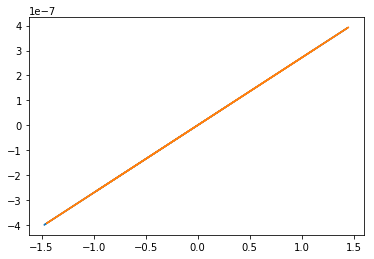

In [275]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

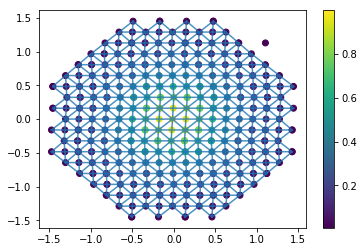

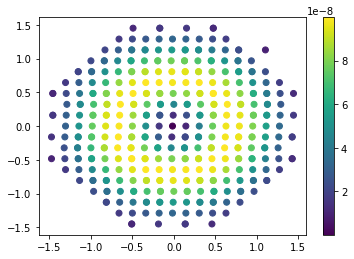

In [276]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()

In [260]:
A = np.arange(0, 1000)
i = 200

In [266]:
from time import time
t0 = time()
for j in np.arange(0,1000):
    sum(i > k for k in A)
print(time()-t0)


4.542107820510864


In [267]:
from time import time
t0 = time()
for j in np.arange(0,1000):
    len(np.where(i > A)[0])
print(time()-t0)

0.0069277286529541016
